# Patterned DBS Pilot

In [1]:
import plotly
import plotly.graph_objs as go

# Importing Python and external packages


import os
import sys
import importlib
from importlib import reload 
from dataclasses import dataclass, field, fields
from itertools import compress
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler

import scipy
from scipy import stats
from scipy import signal
from scipy.signal import spectrogram, hann, butter, filtfilt, freqz

import seaborn as sns
import pingouin as pg
from itertools import combinations
from statannotations.Annotator import Annotator

import openpyxl
from openpyxl import Workbook, load_workbook
# import xlrd
import pickle
import json
import csv
import h5py
import fooof
from fooof.plts.spectra import plot_spectrum

#mne
from pathlib import Path
import mne_bids
from mne_bids import (
    BIDSPath,
    inspect_dataset,
    mark_channels)
import mne
from mne.time_frequency import tfr_morlet 



In [99]:
jennifer_user_path = os.getcwd()
while jennifer_user_path[-14:] != 'jenniferbehnke':
    jennifer_user_path = os.path.dirname(jennifer_user_path)

# directory to this Repository
project_path = os.path.join(jennifer_user_path, 'code', 'BetaSenSightLongterm', 'BetaSenSightLongterm')
sys.path.append(project_path)

os.chdir(project_path)

import src.bssu.utils.find_folders as find_folders
importlib.reload(find_folders)

# import PyPerceive

project_path = find_folders.chdir_repository("Py_Perceive")

from PerceiveImport.classes import (
    main_class, modality_class, metadata_class,
    session_class, condition_class, task_class,
    contact_class, run_class
)

import PerceiveImport.methods.load_rawfile as load_rawfile
import PerceiveImport.methods.find_folders as PyPerceive_find_folders
import PerceiveImport.methods.metadata_helpers as metaHelpers

# import meet

project_path = find_folders.chdir_repository("meet")

import meet as meet

# import all functions from BetaSenSightLongterm
project_path = find_folders.chdir_repository("BetaSenSightLongterm")

# tfr, processing
import src.bssu.tfr.BSSuPsd as BSSuPsd
import src.bssu.tfr.FastFourierPSD as FFpsd

# patterned DBS
import src.bssu.patterned_dbs.patterned_dbs_pilot as patterned_dbs_pilot

# bipolar Channel Analysis
import src.bssu.bipolar.power_spectra_plots as power_spectra_plots
import src.bssu.bipolar.PeakFrequencies_PSD as PeakFrequency_psd
import src.bssu.bipolar.BIP_channelGroups as BIP_channelGroups
import src.bssu.bipolar.BIP_perChannelAnalysis as BIP_perChannel


# monopolar Referencing
import src.bssu.monopolar.MonoRef_JLB as MonoRefJLB
import src.bssu.monopolar.GroupMonopolarPSD as groupMonopol
import src.bssu.monopolar.monoRef_weightPsdAverageByCoordinateDistance as MonoRefWeightedCoordinateDistance
import src.bssu.monopolar.externalized_lfp as externalized
import src.bssu.monopolar.monopol_method_comparison as monopol_comparison
import src.bssu.monopolar.bssu_contacts_maximal_beta as bssu_contacts
import src.bssu.monopolar.monoRef_Strelow as detec_strelow

# Ranking Order
import src.bssu.ranking.HighestRankedChannelPSD as highestRank
import src.bssu.ranking.monopolPSDaverage_withinSubject as PSDaverageMonopol
import src.bssu.ranking.BIPchannelGroups_ranks as BIP_ranks
import src.bssu.ranking.Permutation_rankings as Permute_ranks


# Clinical stimulation parameters
import src.bssu.stimulation.activeStimulationContacts as activeStimContacts

# utility functions
import src.bssu.utils.loadResults as loadResults
import src.bssu.utils.find_folders as find_folders
import src.bssu.utils.writeGroupDataframes as writeGroupDF
import src.bssu.utils.load_data_files as load_data
import src.bssu.utils.monopol_comparison_helpers as mono_comp_helpers
import src.bssu.utils.patterned_dbs_helpers as patterned_dbs_helpers

# import Classes
from src.bssu.classes import (metadataAnalysis_class, mainAnalysis_class, sessionAnalysis_class, 
                              channelAnalysis_class, featureAnalysis_class, frequencyBand_class)

# import mni coordinates
import src.bssu.mni.load_rotated_coordinates as load_mni


importlib.reload(BSSuPsd)
importlib.reload(MonoRefJLB)
importlib.reload(loadResults)
importlib.reload(highestRank)
importlib.reload(groupMonopol)
importlib.reload(PSDaverageMonopol)
importlib.reload(FFpsd)
importlib.reload(find_folders)
importlib.reload(metadataAnalysis_class)
importlib.reload(mainAnalysis_class)
importlib.reload(sessionAnalysis_class)
importlib.reload(channelAnalysis_class)
importlib.reload(featureAnalysis_class)
importlib.reload(frequencyBand_class)
importlib.reload(PeakFrequency_psd)
importlib.reload(power_spectra_plots)
importlib.reload(BIP_channelGroups)
importlib.reload(BIP_ranks)
importlib.reload(activeStimContacts)
importlib.reload(Permute_ranks)
importlib.reload(BIP_perChannel)
importlib.reload(load_mni)
importlib.reload(writeGroupDF)
importlib.reload(MonoRefWeightedCoordinateDistance)
importlib.reload(load_data)
importlib.reload(externalized)
importlib.reload(monopol_comparison)
importlib.reload(bssu_contacts)
importlib.reload(mono_comp_helpers)
importlib.reload(detec_strelow)
importlib.reload(patterned_dbs_helpers)
importlib.reload(patterned_dbs_pilot)

Excel file loaded:  patient_metadata.xlsx 
loaded from:  /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Monopolar_power_estimation/data


<module 'src.bssu.patterned_dbs.patterned_dbs_pilot' from '/Users/jenniferbehnke/code/BetaSenSightLongterm/BetaSenSightLongterm/src/bssu/patterned_dbs/patterned_dbs_pilot.py'>

In [3]:
# load if you want to see complete Dataframes
pd.set_option("display.max_rows", None)

In [192]:
%matplotlib inline

## Load the time domain streamings of sub 075 3MFU 

Load the source JSON

In [20]:
source_json = patterned_dbs_helpers.load_source_json_patterned_dbs(sub="075", incl_session=["fu3m"], run="2")

add run 1
add run 2


In [29]:
source_json["BrainSenseTimeDomain"][0].keys()

dict_keys(['Pass', 'GlobalSequences', 'GlobalPacketSizes', 'TicksInMses', 'Channel', 'Gain', 'FirstPacketDateTime', 'SampleRateInHz', 'TimeDomainData'])

Write the pickle files

In [171]:
all_streamings = patterned_dbs_pilot.write_json_streaming_info(sub="075", incl_session=["fu3m"], run="2")

add run 1
add run 2
Creating RawArray with float64 data, n_channels=1, n_times=30437
    Range : 0 ... 30436 =      0.000 ...   121.744 secs
Ready.
Creating RawArray with float64 data, n_channels=1, n_times=30437
    Range : 0 ... 30436 =      0.000 ...   121.744 secs
Ready.
Creating RawArray with float64 data, n_channels=1, n_times=76687
    Range : 0 ... 76686 =      0.000 ...   306.744 secs
Ready.
Creating RawArray with float64 data, n_channels=1, n_times=76687
    Range : 0 ... 76686 =      0.000 ...   306.744 secs
Ready.
Creating RawArray with float64 data, n_channels=1, n_times=30875
    Range : 0 ... 30874 =      0.000 ...   123.496 secs
Ready.
Creating RawArray with float64 data, n_channels=1, n_times=30875
    Range : 0 ... 30874 =      0.000 ...   123.496 secs
Ready.
Creating RawArray with float64 data, n_channels=1, n_times=77125
    Range : 0 ... 77124 =      0.000 ...   308.496 secs
Ready.
Creating RawArray with float64 data, n_channels=1, n_times=77125
    Range : 0 ... 7

In [4]:
data = patterned_dbs_helpers.load_pickle_files(filename="streaming_info_patterned_pilot_sub-075")
data

,streaming_index,original_time_domain_data,channel,time_domain_dataframe,rec_duration,pre_or_post,burstDBS_or_cDBS,DBS_duration,hemisphere
0,0,"[14.1180201302, 9.6776750892, 0.3415650031, -1...",ZERO_TWO_LEFT,time ZERO_TWO_LEFT 0 0.000 ...,121.744,pre,burstDBS,1min,Left
1,1,"[-9.0673712548, -5.7804491749, 0.7933949848, -...",ZERO_TWO_RIGHT,time ZERO_TWO_RIGHT 0 0.000 ...,121.744,pre,burstDBS,1min,Right
2,2,"[-11.2716451039, -8.1975600756, 1.2524050115, ...",ZERO_TWO_LEFT,time ZERO_TWO_LEFT 0 0.000 ...,306.744,post,burstDBS,1min,Left
3,3,"[-2.153500673, -2.6068692357, 4.4203434867, 6....",ZERO_TWO_RIGHT,time ZERO_TWO_RIGHT 0 0.000 ...,306.744,post,burstDBS,1min,Right
4,4,"[-17.7613801638, -20.9493201931, -16.167410149...",ZERO_TWO_LEFT,time ZERO_TWO_LEFT 0 0.000 ...,123.496,pre,cDBS,1min,Left
5,5,"[-4.0803170646, -7.5939234259, -8.7273448327, ...",ZERO_TWO_RIGHT,time ZERO_TWO_RIGHT 0 0.000 ...,123.496,pre,cDBS,1min,Right
6,6,"[3.4156500315, -0.6831300063, -8.7668350808, -...",ZERO_TWO_LEFT,time ZERO_TWO_LEFT 0 0.000 ...,308.496,post,cDBS,1min,Left
7,7,"[-2.0401585323, 1.5867899696, 5.3270806122, 2....",ZERO_TWO_RIGHT,time ZERO_TWO_RIGHT 0 0.000 ...,308.496,post,cDBS,1min,Right
8,8,"[8.9945450829, 20.60775519, 28.3498952614, 36....",ZERO_TWO_LEFT,time ZERO_TWO_LEFT 0 0.000 ...,123.996,pre,burstDBS,5min,Left
9,9,"[-11.6742404905, -9.6340819582, -4.9870541901,...",ZERO_TWO_RIGHT,time ZERO_TWO_RIGHT 0 0.000 ...,123.996,pre,burstDBS,5min,Right


In [5]:
raw_objects = patterned_dbs_helpers.load_pickle_files(filename="raw_objects_patterned_pilot_sub-075")
raw_objects

{'0': <RawArray | 1 x 30437 (121.7 s), ~244 kB, data loaded>,
 '1': <RawArray | 1 x 30437 (121.7 s), ~244 kB, data loaded>,
 '2': <RawArray | 1 x 76687 (306.7 s), ~605 kB, data loaded>,
 '3': <RawArray | 1 x 76687 (306.7 s), ~605 kB, data loaded>,
 '4': <RawArray | 1 x 30875 (123.5 s), ~247 kB, data loaded>,
 '5': <RawArray | 1 x 30875 (123.5 s), ~247 kB, data loaded>,
 '6': <RawArray | 1 x 77125 (308.5 s), ~608 kB, data loaded>,
 '7': <RawArray | 1 x 77125 (308.5 s), ~608 kB, data loaded>,
 '8': <RawArray | 1 x 31000 (124.0 s), ~248 kB, data loaded>,
 '9': <RawArray | 1 x 31000 (124.0 s), ~248 kB, data loaded>,
 '10': <RawArray | 1 x 146500 (586.0 s), ~1.1 MB, data loaded>,
 '11': <RawArray | 1 x 146500 (586.0 s), ~1.1 MB, data loaded>,
 '12': <RawArray | 1 x 30875 (123.5 s), ~247 kB, data loaded>,
 '13': <RawArray | 1 x 30875 (123.5 s), ~247 kB, data loaded>,
 '16': <RawArray | 1 x 145063 (580.2 s), ~1.1 MB, data loaded>,
 '17': <RawArray | 1 x 145063 (580.2 s), ~1.1 MB, data loaded>

## Start from beginning: Load the JSON file with PyPerceive

In [116]:
mainclass_sub = main_class.PerceiveData(
    sub = "075", 
    incl_modalities= ["streaming"],
    incl_session = ["fu3m"],
    incl_condition = ["m0s1"],
    incl_task = ["rest"],
    import_json = True,
    # warn_for_metaNaNs = True,
    # allow_NaNs_in_metadata = True,
)

add run 1
add run 2


In [117]:
sub075_JSON = mainclass_sub.streaming.fu3m.m0s1.rest.run2.json

In [115]:
recordings_dict = {
    "0": ["pre", "burstDBS", "1min" "Left"],
    "1": ["pre", "burstDBS", "1min" "Right"],
    "2": ["post", "burstDBS", "1min" "Left"],
    "3": ["post", "burstDBS", "1min" "Right"],
    "4": ["pre", "cDBS", "1min", "Left"],
    "5": ["pre", "cDBS", "1min", "Right"],
    "6": ["post", "cDBS", "1min", "Left"],
    "7": ["post", "cDBS", "1min", "Right"],
    "8": ["pre", "burstDBS", "5min" "Left"],
    "9": ["pre", "burstDBS", "5min" "Right"],
    "10": ["post", "burstDBS", "5min" "Left"],
    "11": ["post", "burstDBS", "5min" "Right"],
    "12": ["pre", "cDBS", "5min" "Left"],
    "13": ["pre", "cDBS", "5min" "Right"],
    "16": ["post", "cDBS", "5min" "Left"],
    "17": ["post", "cDBS", "5min" "Right"],
    "18": ["pre", "burstDBS", "30min" "Left"],
    "19": ["pre", "burstDBS", "30min" "Right"],
    "22": ["post", "burstDBS", "5min" "Left"], # 8.45 min
    "23": ["post", "burstDBS", "5min" "Right"], # 8.45 min
}

# 14,15 only 3 seconds
# 20, 21 only 20 seconds

list(recordings_dict.keys())

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '16',
 '17',
 '18',
 '19',
 '22',
 '23']

In [131]:
index_streaming = 6


# BrainSenseTimeDomain length: 24
# BrainSenseTimeDomain[0] keys: "TimeDomainData", "Channel", "Gain"

TimeDomainData = sub075_JSON["BrainSenseTimeDomain"][index_streaming]["TimeDomainData"]
channel = sub075_JSON["BrainSenseTimeDomain"][index_streaming]["Channel"] # first 'ZERO_TWO_LEFT', then 'ZERO_TWO_RIGHT'

units = ["µVolt"]
scale = np.array([1e-6 if u == "µVolt" else 1 for u in units])

info = mne.create_info(ch_names=[channel], sfreq=250, ch_types="dbs")
raw = mne.io.RawArray(TimeDomainData * np.expand_dims(scale, axis=1), info)

print(f"duration: {raw.tmax} sec, channel_ {channel}")

Creating RawArray with float64 data, n_channels=1, n_times=77125
    Range : 0 ... 77124 =      0.000 ...   308.496 secs
Ready.
duration: 308.496 sec, channel_ ZERO_TWO_LEFT


In [132]:
raw.ch_names

['ZERO_TWO_LEFT']

In [133]:
dataframe = raw.to_data_frame()
dataframe.head()

,time,ZERO_TWO_LEFT
0,0.000,3.415650
1,0.004,-0.683130
2,0.008,-8.766835
3,0.012,-8.880690
4,0.016,-0.796985


In [61]:
raw.tmax # duration of recording in seconds

121.744

In [58]:
dataframe.loc[(raw.n_times)-1, "time"]

121.744

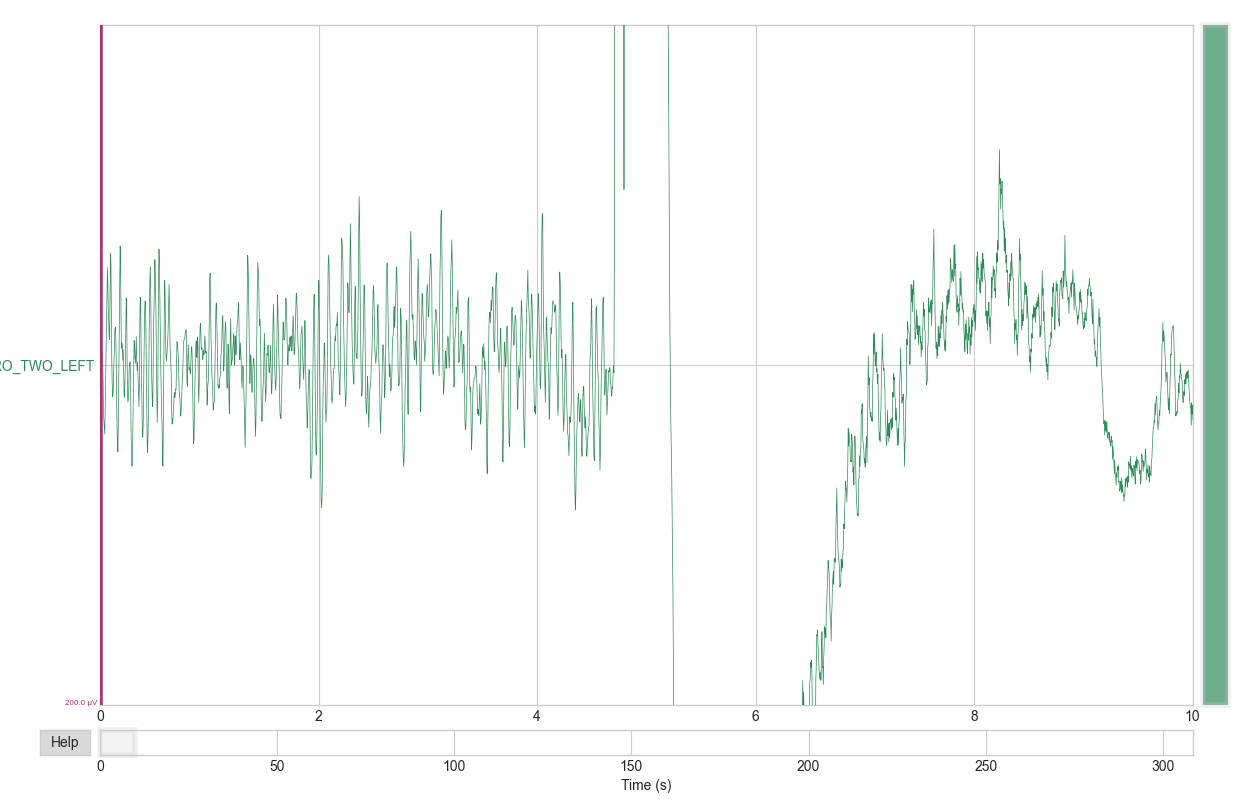

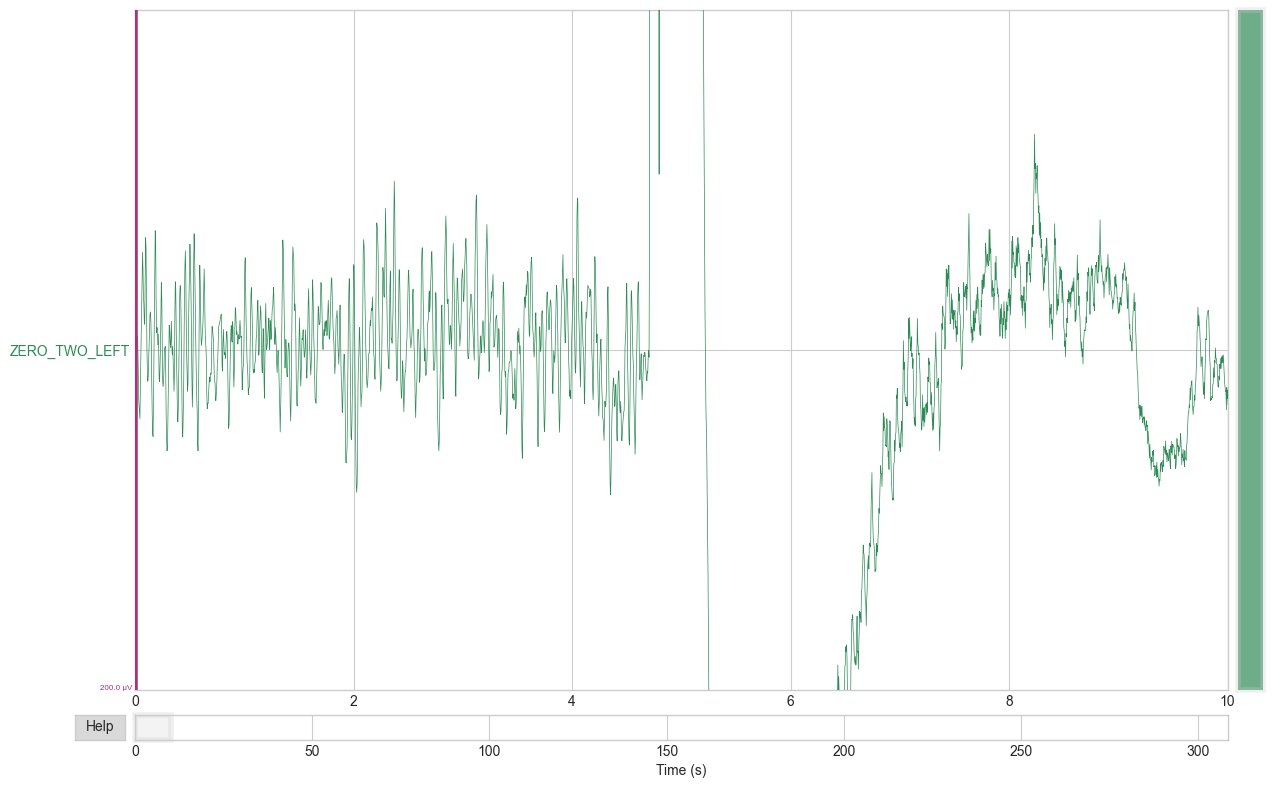

In [134]:
raw.plot()

## Plot Time Frequency Plot of Patterned DBS Pilot (sub075)

Figures time_frequency_plot_sub-075_Right_3MFU_pilot_30min.svg and time_frequency_plot_sub-075_Right_3MFU_pilot_30min.png 
were written in: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/figures.
Figures time_frequency_plot_sub-075_Left_3MFU_pilot_30min.svg and time_frequency_plot_sub-075_Left_3MFU_pilot_30min.png 
were written in: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/figures.


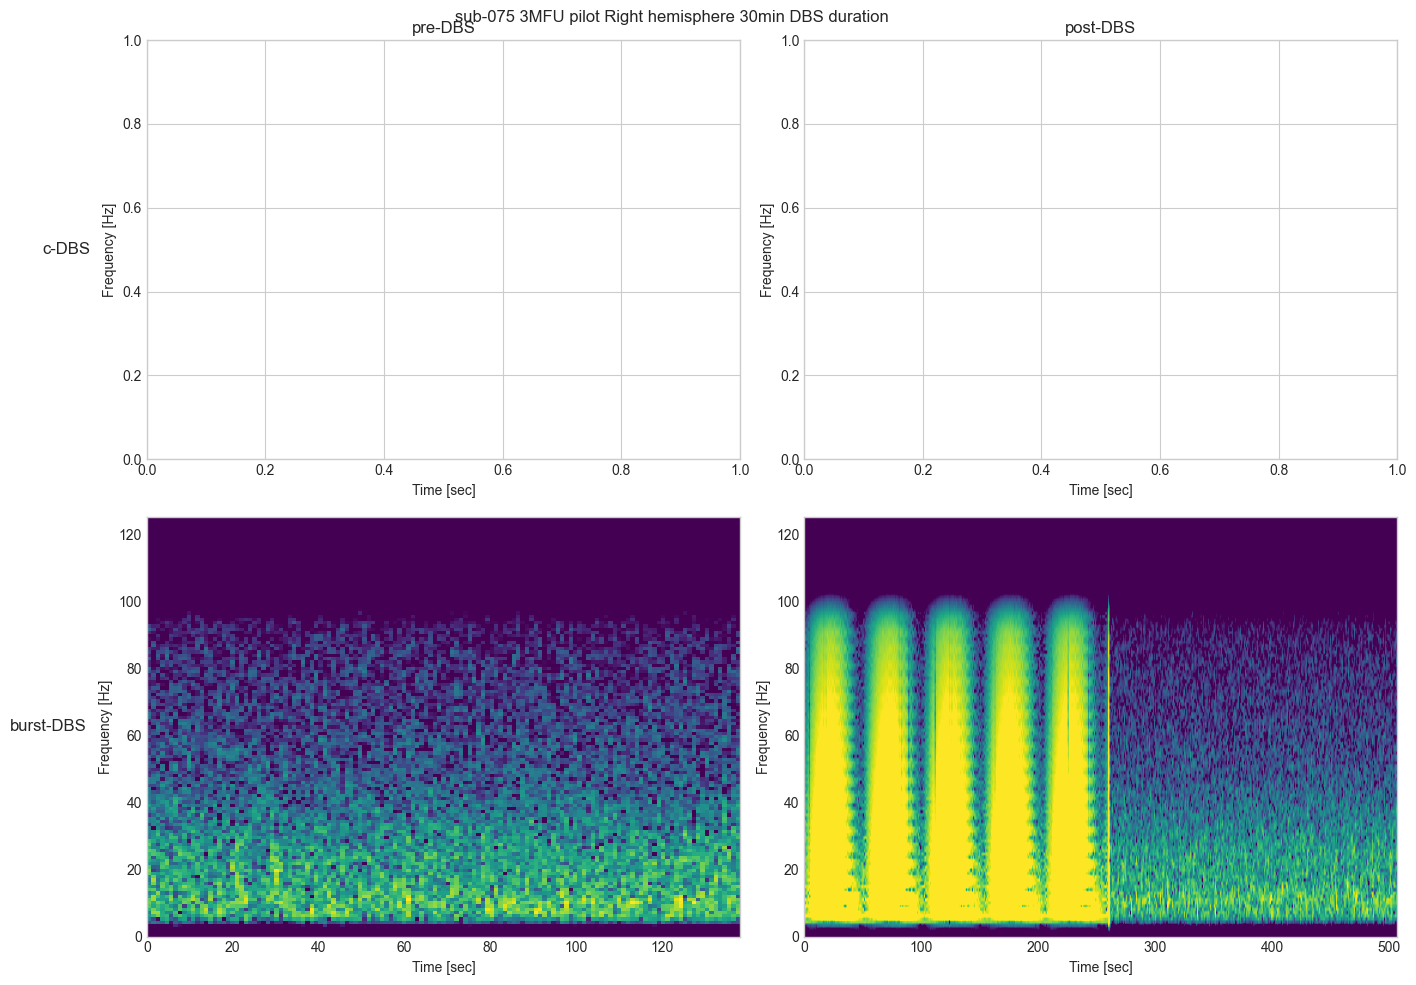

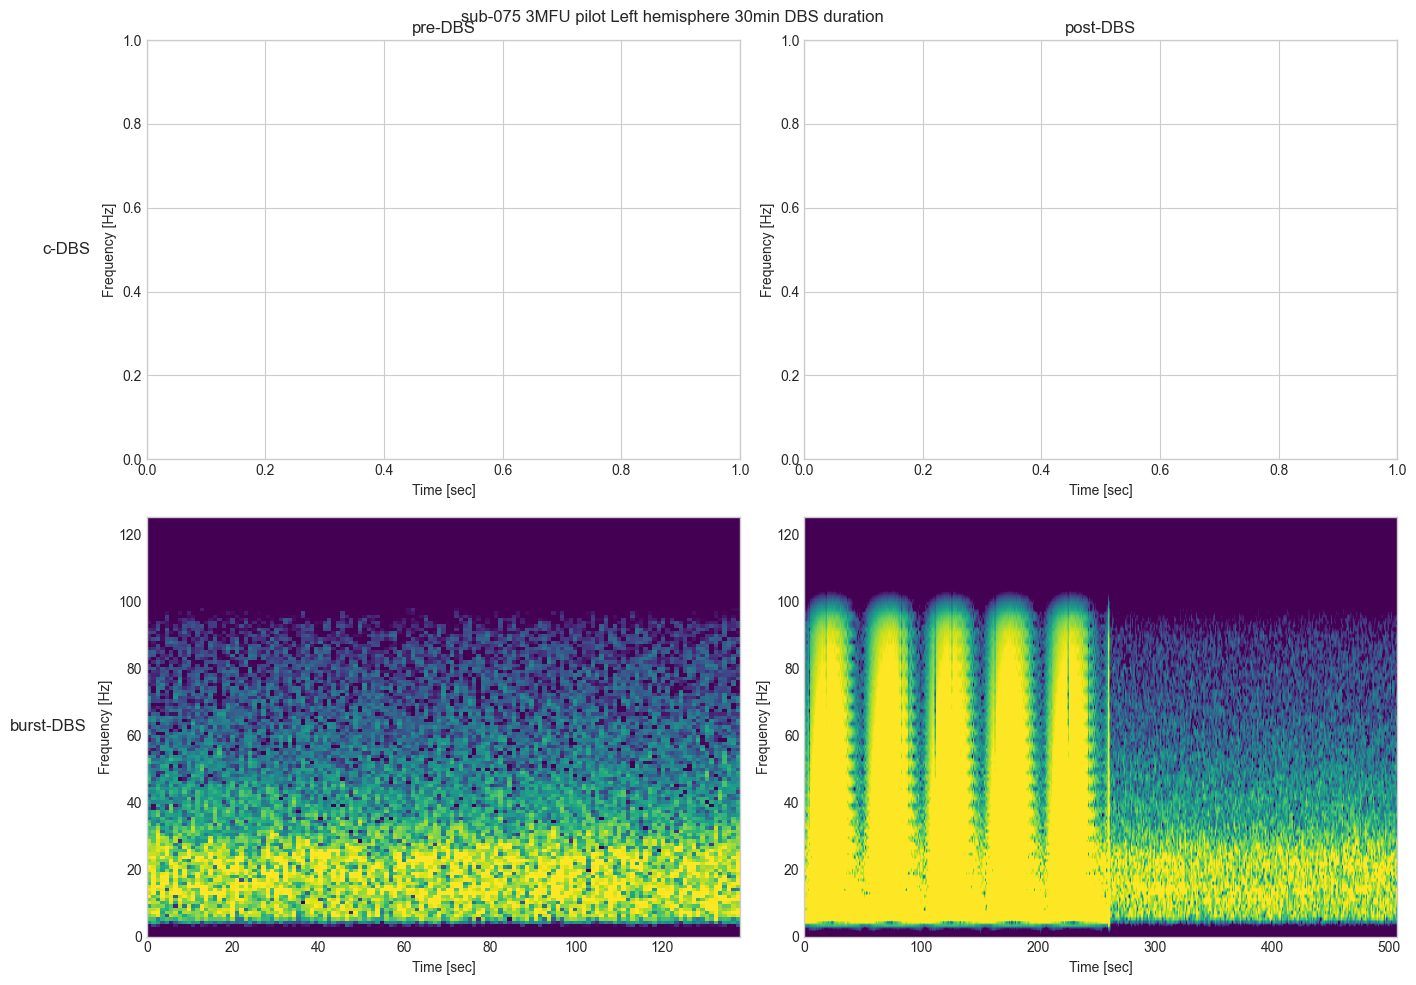

In [12]:
time_frequency = patterned_dbs_pilot.plot_time_frequency(dbs_duration="30min")

In [212]:
data = patterned_dbs_helpers.load_pickle_files(filename="streaming_info_patterned_pilot_sub-075")
pre_burstDBS_1min = data.original_time_domain_data.values[0]



In [209]:
version_dataframe

array([14.11802013,  9.67767509,  0.341565  , ..., -2.27710002,
       -3.64336003,  1.48011501])

In [203]:
data

,streaming_index,original_time_domain_data,channel,time_domain_dataframe,rec_duration,pre_or_post,burstDBS_or_cDBS,DBS_duration,hemisphere
0,0,"[14.1180201302, 9.6776750892, 0.3415650031, -1...",ZERO_TWO_LEFT,time ZERO_TWO_LEFT 0 0.000 ...,121.744,pre,burstDBS,1min,Left
1,1,"[-9.0673712548, -5.7804491749, 0.7933949848, -...",ZERO_TWO_RIGHT,time ZERO_TWO_RIGHT 0 0.000 ...,121.744,pre,burstDBS,1min,Right
2,2,"[-11.2716451039, -8.1975600756, 1.2524050115, ...",ZERO_TWO_LEFT,time ZERO_TWO_LEFT 0 0.000 ...,306.744,post,burstDBS,1min,Left
3,3,"[-2.153500673, -2.6068692357, 4.4203434867, 6....",ZERO_TWO_RIGHT,time ZERO_TWO_RIGHT 0 0.000 ...,306.744,post,burstDBS,1min,Right
4,4,"[-17.7613801638, -20.9493201931, -16.167410149...",ZERO_TWO_LEFT,time ZERO_TWO_LEFT 0 0.000 ...,123.496,pre,cDBS,1min,Left
5,5,"[-4.0803170646, -7.5939234259, -8.7273448327, ...",ZERO_TWO_RIGHT,time ZERO_TWO_RIGHT 0 0.000 ...,123.496,pre,cDBS,1min,Right
6,6,"[3.4156500315, -0.6831300063, -8.7668350808, -...",ZERO_TWO_LEFT,time ZERO_TWO_LEFT 0 0.000 ...,308.496,post,cDBS,1min,Left
7,7,"[-2.0401585323, 1.5867899696, 5.3270806122, 2....",ZERO_TWO_RIGHT,time ZERO_TWO_RIGHT 0 0.000 ...,308.496,post,cDBS,1min,Right
8,8,"[8.9945450829, 20.60775519, 28.3498952614, 36....",ZERO_TWO_LEFT,time ZERO_TWO_LEFT 0 0.000 ...,123.996,pre,burstDBS,5min,Left
9,9,"[-11.6742404905, -9.6340819582, -4.9870541901,...",ZERO_TWO_RIGHT,time ZERO_TWO_RIGHT 0 0.000 ...,123.996,pre,burstDBS,5min,Right


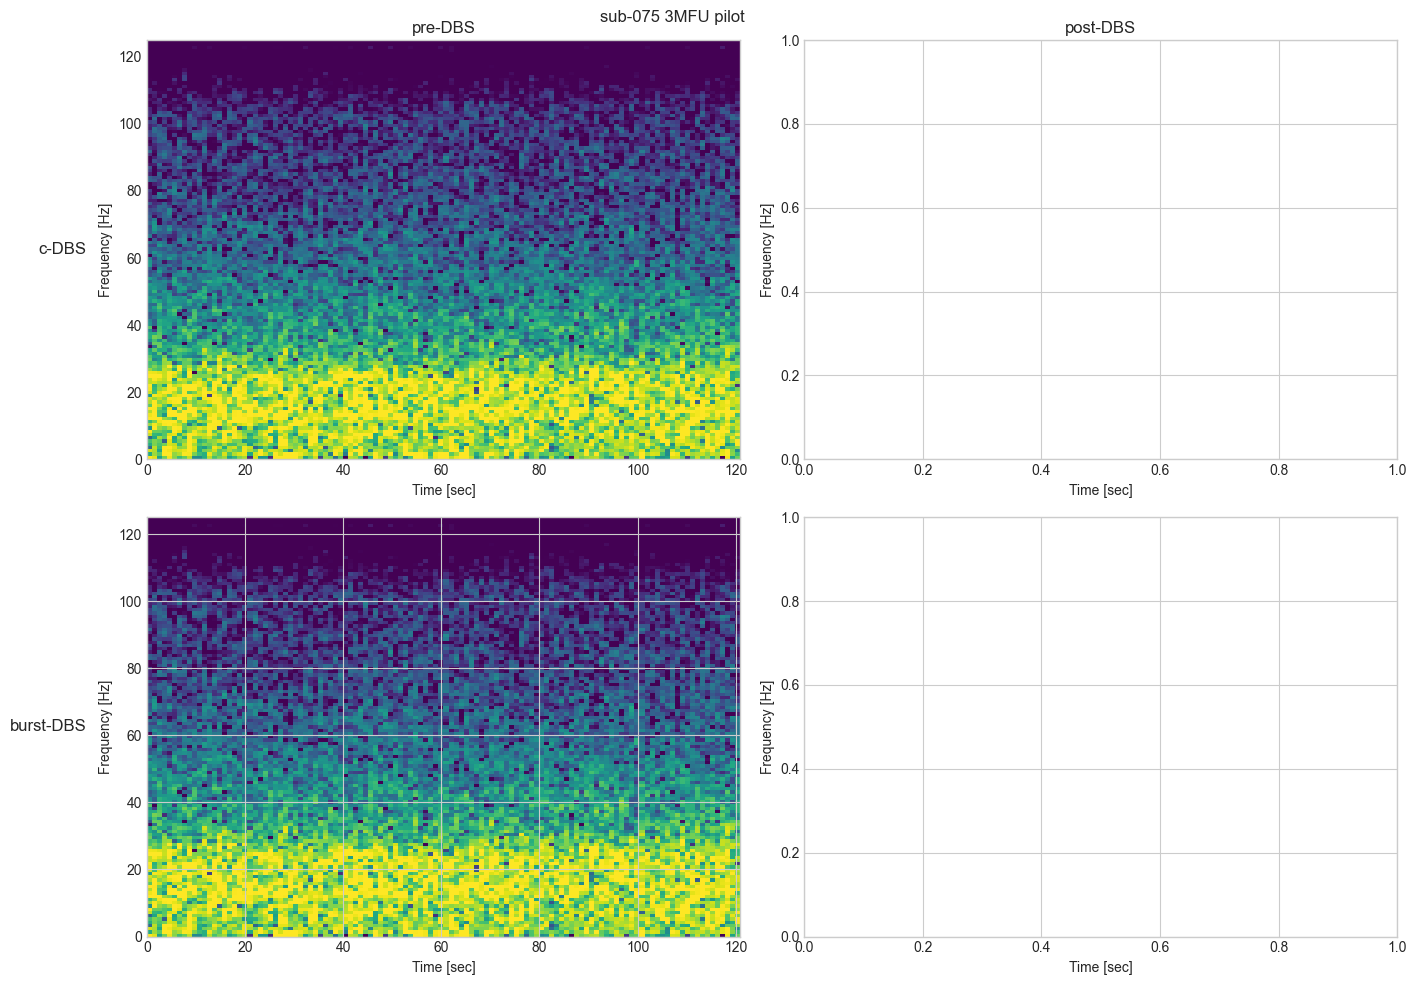

In [213]:
# Figure Layout
# set layout for figures: using the object-oriented interface

cols = ["pre-DBS", "post-DBS"]
rows = ["c-DBS", "burst-DBS"]

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
plt.setp(axes.flat, xlabel='Time [sec]', ylabel='Frequency [Hz]')

pad = 5 # in points

for ax, col in zip(axes[0], cols):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')

for ax, row in zip(axes[:,0], rows):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')

fig.tight_layout()
# tight_layout doesn't take these labels into account. We'll need 
# to make some room. These numbers are are manually tweaked. 
# You could automatically calculate them, but it's a pain.
fig.subplots_adjust(left=0.15, top=0.95)
fig.suptitle(f"sub-075 3MFU pilot")


# filter band-pass 5-95 Hz


# plot TF 

fs =250
noverlap = 0

axes[0, 0].specgram(x = pre_burstDBS_1min, Fs = fs, noverlap = noverlap, cmap = 'viridis', vmin = -25, vmax = 10)
axes[1, 0].specgram(x = version_dataframe, Fs = fs, noverlap = noverlap, cmap = 'viridis', vmin = -25, vmax = 10)

axes[0, 0].grid(False)                
                

## Quantify Beta relative to baseline

In [106]:
beta_pre_dbs = patterned_dbs_pilot.calculate_beta_baseline(dbs_duration="30min", cDBS_or_burst_DBS= "burstDBS", filtered="band-pass_5_to_95")

In [101]:
beta_pre_dbs.head()

,hemisphere,dbs_duration,cDBS_or_burst_DBS,filtered,freq_band,frequencies,times,Zxx,average_Zxx,std_Zxx,sem_Zxx,normalized_to_5_95,normalized_to_40_90,f_average_rel_to_5_95,f_average_rel_to_40_90,f_average_raw
0,Right,1min,cDBS,band-pass_5_to_95,beta,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, ...","[[0.2710545896651357, 0.03550002956762388, 0.0...","[0.37851417903749646, 1.9308339872753442, 2.61...","[0.5469294478332832, 2.027345035278832, 2.4572...","[0.03537792499593012, 0.1311380487613253, 0.15...","[0.015084698153425995, 0.07694836678638463, 0....","[0.25207519390664535, 1.2858576473452492, 1.74...",0.019916,0.332805,0.499738
1,Right,1min,cDBS,band-pass_5_to_95,low_beta,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, ...","[[0.2710545896651357, 0.03550002956762388, 0.0...","[0.37851417903749646, 1.9308339872753442, 2.61...","[0.5469294478332832, 2.027345035278832, 2.4572...","[0.03537792499593012, 0.1311380487613253, 0.15...","[0.015084698153425995, 0.07694836678638463, 0....","[0.25207519390664535, 1.2858576473452492, 1.74...",0.031405,0.524800,0.788036
2,Right,1min,cDBS,band-pass_5_to_95,high_beta,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, ...","[[0.2710545896651357, 0.03550002956762388, 0.0...","[0.37851417903749646, 1.9308339872753442, 2.61...","[0.5469294478332832, 2.027345035278832, 2.4572...","[0.03537792499593012, 0.1311380487613253, 0.15...","[0.015084698153425995, 0.07694836678638463, 0....","[0.25207519390664535, 1.2858576473452492, 1.74...",0.013788,0.230408,0.345978
3,Left,1min,cDBS,band-pass_5_to_95,beta,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, ...","[[0.0005264029802059451, 1.108160414101214, 2....","[0.8562514636824013, 5.648022123400776, 5.4089...","[1.5740023330546622, 6.521118540831318, 5.6947...","[0.1018137470981466, 0.4218160926259422, 0.368...","[0.004699884455901589, 0.031001466870724807, 0...","[0.16049996362015406, 1.058692900136039, 1.013...",0.029064,0.992541,5.295110
4,Left,1min,cDBS,band-pass_5_to_95,low_beta,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, ...","[[0.0005264029802059451, 1.108160414101214, 2....","[0.8562514636824013, 5.648022123400776, 5.4089...","[1.5740023330546622, 6.521118540831318, 5.6947...","[0.1018137470981466, 0.4218160926259422, 0.368...","[0.004699884455901589, 0.031001466870724807, 0...","[0.16049996362015406, 1.058692900136039, 1.013...",0.044814,1.530396,8.164510


In [30]:
data = patterned_dbs_helpers.load_pickle_files(filename="streaming_info_patterned_pilot_sub-075")
data

,streaming_index,original_time_domain_data,channel,time_domain_dataframe,rec_duration,pre_or_post,burstDBS_or_cDBS,DBS_duration,hemisphere
0,0,"[14.1180201302, 9.6776750892, 0.3415650031, -1...",ZERO_TWO_LEFT,time ZERO_TWO_LEFT 0 0.000 ...,121.744,pre,burstDBS,1min,Left
1,1,"[-9.0673712548, -5.7804491749, 0.7933949848, -...",ZERO_TWO_RIGHT,time ZERO_TWO_RIGHT 0 0.000 ...,121.744,pre,burstDBS,1min,Right
2,2,"[-11.2716451039, -8.1975600756, 1.2524050115, ...",ZERO_TWO_LEFT,time ZERO_TWO_LEFT 0 0.000 ...,306.744,post,burstDBS,1min,Left
3,3,"[-2.153500673, -2.6068692357, 4.4203434867, 6....",ZERO_TWO_RIGHT,time ZERO_TWO_RIGHT 0 0.000 ...,306.744,post,burstDBS,1min,Right
4,4,"[-17.7613801638, -20.9493201931, -16.167410149...",ZERO_TWO_LEFT,time ZERO_TWO_LEFT 0 0.000 ...,123.496,pre,cDBS,1min,Left
5,5,"[-4.0803170646, -7.5939234259, -8.7273448327, ...",ZERO_TWO_RIGHT,time ZERO_TWO_RIGHT 0 0.000 ...,123.496,pre,cDBS,1min,Right
6,6,"[3.4156500315, -0.6831300063, -8.7668350808, -...",ZERO_TWO_LEFT,time ZERO_TWO_LEFT 0 0.000 ...,308.496,post,cDBS,1min,Left
7,7,"[-2.0401585323, 1.5867899696, 5.3270806122, 2....",ZERO_TWO_RIGHT,time ZERO_TWO_RIGHT 0 0.000 ...,308.496,post,cDBS,1min,Right
8,8,"[8.9945450829, 20.60775519, 28.3498952614, 36....",ZERO_TWO_LEFT,time ZERO_TWO_LEFT 0 0.000 ...,123.996,pre,burstDBS,5min,Left
9,9,"[-11.6742404905, -9.6340819582, -4.9870541901,...",ZERO_TWO_RIGHT,time ZERO_TWO_RIGHT 0 0.000 ...,123.996,pre,burstDBS,5min,Right


In [31]:
pre_burstDBS_1min = data[data["DBS_duration"] == "1min"]
pre_burstDBS_1min = pre_burstDBS_1min[pre_burstDBS_1min["burstDBS_or_cDBS"] == "burstDBS"]
pre_burstDBS_1min = pre_burstDBS_1min[pre_burstDBS_1min["pre_or_post"] == "pre"]
pre_burstDBS_1min

,streaming_index,original_time_domain_data,channel,time_domain_dataframe,rec_duration,pre_or_post,burstDBS_or_cDBS,DBS_duration,hemisphere
0,0,"[14.1180201302, 9.6776750892, 0.3415650031, -1...",ZERO_TWO_LEFT,time ZERO_TWO_LEFT 0 0.000 ...,121.744,pre,burstDBS,1min,Left
1,1,"[-9.0673712548, -5.7804491749, 0.7933949848, -...",ZERO_TWO_RIGHT,time ZERO_TWO_RIGHT 0 0.000 ...,121.744,pre,burstDBS,1min,Right


In [46]:
time_domain_data = pre_burstDBS_1min.time_domain_dataframe.values[0]


In [50]:
last_120_sec = pre_burstDBS_1min.original_time_domain_data.values[0][-30000:]
np.array(last_120_sec)

[-7.9698500735,
 -8.1975600756,
 -4.8957650451,
 3.8710700357,
 7.1728650661,
 7.7421400714,
 9.3361100861,
 4.4403450409,
 -1.7078250157,
 -5.1234750472,
 -8.0837050745,
 -9.222255085,
 -4.3264900399,
 10.2469500945,
 26.4143602435,
 31.3101252887,
 16.2812651501,
 4.8957650451,
 0.6831300063,
 -5.2373300483,
 -11.6132101071,
 -21.8601602015,
 -26.9836352488,
 -24.4788252257,
 -19.1276401764,
 -11.7270651081,
 -6.2620250577,
 -4.4403450409,
 2.390955022,
 12.5240501155,
 14.3457301323,
 12.8656151186,
 7.6282850703,
 11.8409201092,
 19.6969151816,
 18.4445101701,
 9.222255085,
 -2.1632450199,
 -9.9053850913,
 -12.5240501155,
 -14.4595851333,
 -15.8258451459,
 -16.9643951564,
 -13.0933251207,
 4.4403450409,
 18.7860751732,
 22.2017252047,
 16.8505401554,
 5.6927500525,
 -1.5939700147,
 -9.222255085,
 -16.7366851543,
 -17.0782501575,
 -7.9698500735,
 5.5788950514,
 11.1577901029,
 6.4897350598,
 3.1879400294,
 2.7325200252,
 -0.113855001,
 -1.2524050115,
 1.9355350178,
 3.7572150346,
 1

In [68]:
fourier_transform = patterned_dbs_pilot.fourier_transform(np.array(last_120_sec))

In [81]:
fourier_transform[0]

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125.])

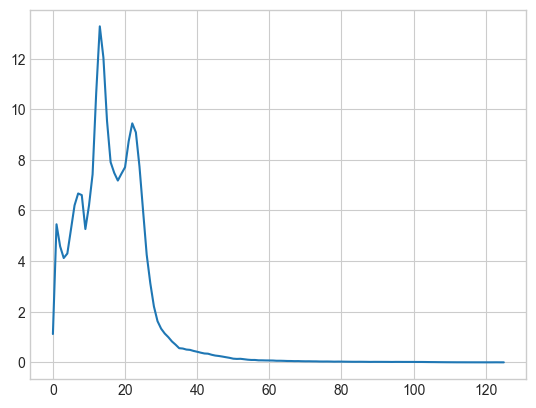

In [78]:
frequencies = fourier_transform[0]
average_power = fourier_transform[3]

plt.plot(frequencies, average_power)